<a href="https://colab.research.google.com/github/BHUVANAN8/Spark_proj_tasks/blob/main/Color_Identification_in_the_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**THE SPARKS FOUNDATION**

**SUBMIT BY : BHUVANESWARI**



## **DOMAIN : COMPUTER VISION AND IOT**
###**TASK 2: Color Identification in Images**

**Objective:** Implement an image color detector which identifies all the colors in an image or video.




**IMPORTING LIBRARIES**

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage.color import rgb2lab
from collections import Counter
import cv2
print("setup complete")


setup complete


## **Read the image**

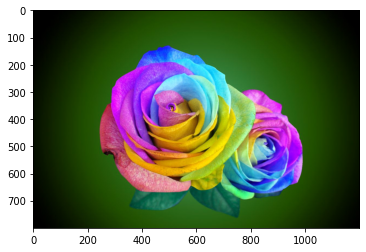

In [31]:
image = cv2.imread('RAINBOWFLOWER.jpg')
plt.imshow(image)

## **Visualize the image in actual size with opencv**

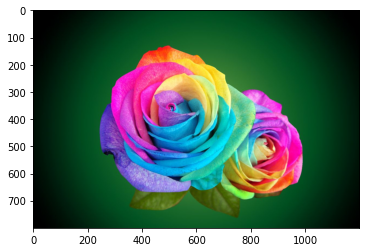

In [32]:
#to convert the image in actual colur by using open cv
image= cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

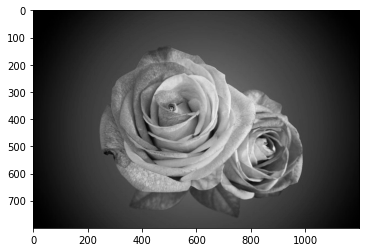

In [33]:
#represent the image as gray
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grey_image, cmap='gray')

###**RESIZING THE IMAGE**

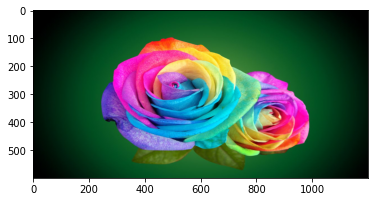

In [35]:
#resize the image
resized_image = cv2.resize(image, (1200 ,600))
plt.imshow(resized_image)

###**RGB TO HEX CONVERSION**

In [40]:
#define a function
def RGB2HEX(colour):
    return "#.{:02x}{:02x}{:02x}".format(int(colour[0]), int(colour[1]), int(colour[2]))

### **READ THE IMAGE IN RGB COLOUR SPACE**

In [41]:
#define a method to read the image inTO PYTHON in the rgb colur space
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    return image
    

### **GET THE COLORS FROM AN IMAGE**

In [55]:
#define a function , resize and reshape the image
def get_colors(image, number_of_colors, show_chart):
    modified_image = cv2.resize(image, (600, 400), interpolation =cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

#Build a classifier
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)

#count all the labels by using counter
    counts = Counter(labels)
    center_colors = clf.cluster_centers_

# We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]

#  We get hex colors by iterating through the keys
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]

 #We get rgb colors by iterating through the keys   
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if(show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
        
    return rgb_colors

###**PLOTTING THE PIE CHART BY CALLING THE function get_colors**

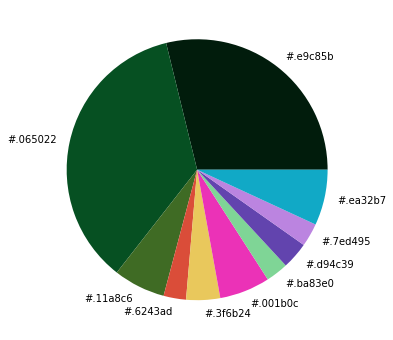

In [54]:
#plot the colur chart by calling get_color method
graph = get_colors(get_image('RAINBOWFLOWER.jpg'), 10, True)